**K-means clustering** is a type of unsupervised machine learning algorithm used to partition data into groups or clusters. Each cluster contains data points that are more similar to each other than to those in other clusters. The goal is to minimize the variance within each cluster while maximizing the variance between clusters.

### **Key Concepts of K-means Clustering:**

1. **K (Number of Clusters):**
   - You need to define the number of clusters (K) before running the algorithm. This is a parameter you specify based on your analysis or using methods like the **elbow method** to find the optimal number of clusters.

2. **Centroids:**
   - The K-means algorithm works by assigning each data point to a cluster based on the distance to a **centroid** (the central point of the cluster). Initially, centroids are randomly assigned, and then they are iteratively updated.

3. **Steps in K-means Clustering:**
   - **Step 1:** Initialize the centroids randomly or by some other method.
   - **Step 2:** Assign each data point to the nearest centroid. This forms clusters.
   - **Step 3:** Recalculate the centroids of each cluster as the mean of all the points assigned to that cluster.
   - **Step 4:** Repeat steps 2 and 3 until the centroids no longer change or the algorithm converges.

4. **Objective:**
   - The objective of K-means is to minimize the **within-cluster variance**, which is the average squared distance between data points and their corresponding centroid. This helps ensure that the points within each cluster are as similar as possible.

### **How K-means Works in Practice:**
1. **Initialization:**
   - Choose **K** initial centroids (usually at random or by selecting points from the dataset).
   
2. **Cluster Assignment:**
   - For each data point, calculate the distance from the point to each centroid. Assign the point to the cluster whose centroid is closest to it.

3. **Centroid Update:**
   - After all points are assigned to clusters, update the centroids by calculating the mean of all points within each cluster.

4. **Repeat:**
   - Repeat the assignment and centroid update steps until the centroids stabilize (i.e., no longer change significantly), or a set number of iterations is reached.

### **Advantages of K-means:**
- **Scalability:** K-means can handle large datasets efficiently.
- **Simplicity:** The algorithm is relatively easy to understand and implement.
- **Speed:** With fewer clusters, K-means can converge quickly, especially with a well-chosen initialization.

### **Disadvantages of K-means:**
- **Choosing K:** The user must specify the number of clusters in advance, which can be tricky without prior knowledge of the data.
- **Sensitivity to Initialization:** The algorithm may converge to different results depending on the initial centroids. However, using methods like **K-means++** for initialization can improve stability.
- **Sensitivity to Outliers:** K-means is sensitive to outliers because the centroids are based on the mean, which can be distorted by extreme values.

### **Applications of K-means:**
- **Customer Segmentation:** Grouping customers based on behavior, demographics, or purchasing patterns.
- **Image Compression:** Reducing the number of colors in an image by clustering similar colors.
- **Document Clustering:** Grouping documents with similar topics or content.
- **Anomaly Detection:** Identifying unusual data points that don’t belong to any cluster.

### **Example:**
If you have a dataset of customer spending and income, you can use K-means clustering to group customers into segments based on their spending and income patterns. Each group can represent a different customer type, such as low-income, high-spending customers or high-income, low-spending customers.


In [3]:
# IMPORTING DEPENDENCIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
# loading the data from the csv file into the Pandas dataframe
customer_data = pd.read_csv("Mall_Customers.csv")

In [9]:
# first 5 rows of the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [12]:
# getting some information about the dataset
customer_data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [13]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# choosing the annual income column and spending score column
X = customer_data.iloc[:,[3,4]].values

In [20]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# WCSS - WTHIN CLUSTERS SUM OF SQUARES
WCSS stands for Within-Cluster Sum of Squares. It is a metric used to evaluate the compactness of the clusters formed by a clustering algorithm, such as K-means. The WCSS measures the total variance within each cluster. The goal of clustering is to minimize the WCSS, as this would indicate that the data points within each cluster are as close to each other as possible.


The WCSS is calculated as the sum of squared distances between each data point in a cluster and the centroid of that cluster.
 

How is WCSS Used in K-means?
In K-means clustering, WCSS is used to evaluate the compactness of the clusters. A lower WCSS value means that the clusters are tighter and more compact (i.e., the points in the cluster are closer to the centroid), whereas a higher WCSS value indicates that the points are spread out farther from the centroid.

Elbow Method and WCSS:
One of the common uses of WCSS is in the elbow method, which helps determine the optimal number of clusters (K) to use in K-means clustering.

Elbow Method:
For different values of K (number of clusters), you calculate the WCSS and plot it against K.
As K increases, the WCSS decreases because more clusters result in more compact groups. However, after a certain point, the rate of decrease in WCSS slows down, forming an "elbow" in the plot.
The point at which the rate of decrease starts to slow down significantly is considered the optimal number of clusters because adding more clusters beyond that point doesn’t provide significant improvements in the cluster quality.

Example of WCSS Calculation:
Suppose you have a dataset with 10 data points and you apply K-means clustering to partition them into 3 clusters. To calculate the WCSS:

Find the centroid of each of the 3 clusters.
Calculate the squared Euclidean distance from each point in a cluster to its respective centroid.
Sum these squared distances for all points in the cluster.
Repeat for all clusters.
Sum the WCSS of all clusters to get the final WCSS value.
Why is WCSS Important?
Cluster Quality: WCSS gives an indication of how well the clustering algorithm has grouped the data. A low WCSS means that the clusters are tight and well-separated.
Choosing K: As mentioned, WCSS helps determine the best value of K by finding the elbow point in the plot.


In [31]:
# finding wcss value for different number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [32]:
print(len(wcss))

10


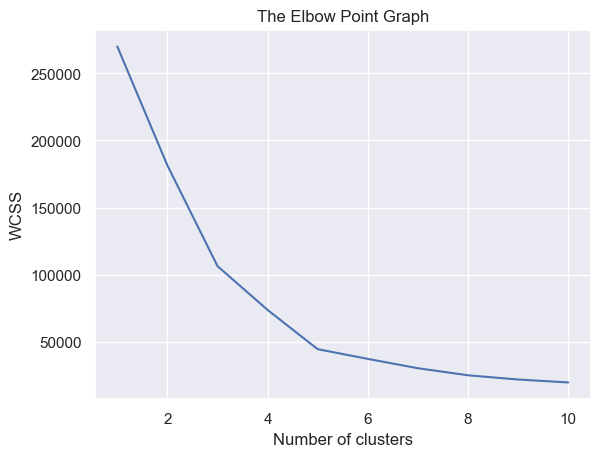

In [33]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [34]:
# Optimum number of clusters

In [35]:
# Training the k-Means Clustering Model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point in the cluster
Y = kmeans.fit_predict(X)

print(Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [36]:
# 5 Clusters = 0,1,2,3,4

In [37]:
# Visualizing all the clusters

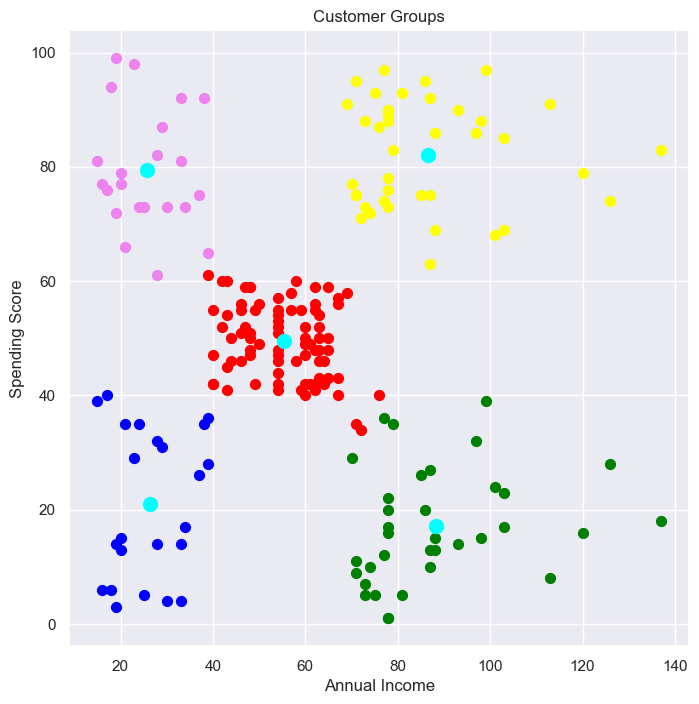

In [38]:
# plotting all the clusters in their centroids
plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0], X[Y == 0,1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s = 50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s = 50, c = 'blue', label = 'Cluster 5')

# plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Absolutely! Based on the code snippet you provided and assuming the project involves customer segmentation using K-means clustering, here are some 
# insightful statements you could use to describe the findings:

# ---

# ### **Insights from Customer Segmentation using K-means Clustering:**

# 1. **Distinct Customer Groups Identified:**
#    - The clustering analysis successfully identified 5 distinct customer segments based on their annual income and spending score.
#    - Each group represents a unique pattern of spending behavior and income level, which can help businesses target their marketing strategies more 
# effectively.

# 2. **Centroids Represent Key Customer Profiles:**
#    - The centroids of each cluster represent the average annual income and spending score of the customers within that group. These centroids can 
# act as the "ideal" customer profile for each segment.
#    - For instance, Cluster 1 may represent customers with low income but high spending behavior, while Cluster 5 could represent high-income 
# customers with moderate spending.

# 3. **Cluster 1: Budget-Conscious Spenders:**
#    - Customers in Cluster 1 tend to have lower annual incomes but exhibit a higher spending score. This suggests they may prioritize spending in 
# specific areas or be highly engaged with certain products or services, despite having a limited budget.

# 4. **Cluster 2: Moderate Income and Balanced Spending:**
#    - Cluster 2 shows customers with moderate income levels who maintain a balanced approach to spending. This group could represent the middle-class 
# segment with stable financial behavior.

# 5. **Cluster 3: High-Income, Low Spending:**
#    - Customers in Cluster 3 exhibit high annual income but relatively low spending scores. This could indicate a more conservative financial 
# behavior, or customers who may be more selective in their purchases.

# 6. **Cluster 4: Affluent, High-Spending Consumers:**
#    - Cluster 4 represents customers with high income and high spending behavior, which suggests they are likely to be key targets for luxury or 
# premium products and services.

# 7. **Cluster 5: Elite Spenders with Higher Income:**
#    - Customers in Cluster 5 exhibit a combination of higher income and moderate spending. These customers may be considered high-value consumers 
# with significant purchasing power but selective in their spending.

# 8. **Implications for Targeted Marketing:**
#    - The segmentation analysis allows for more targeted marketing strategies. For example, businesses can offer discounts or loyalty programs for 
# Cluster 1 customers to encourage spending, or tailor exclusive offers to Cluster 4 and Cluster 5 for higher-end products.

# 9. **Customer Behavior Patterns:**
#    - The distribution of customers across clusters provides insight into spending patterns, helping businesses identify underserved groups or 
# those with untapped potential.

# 10. **Potential for Product Differentiation:**
#     - Understanding these clusters can assist in developing differentiated products or services for each customer segment. For example, 
#     offering budget-friendly options to Cluster 1 or exclusive deals to Cluster 4 could enhance customer satisfaction and loyalty.
